<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pymc3 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 14.4 MB/s 
     |████████████████████████████████| 1.8 MB 67.8 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=4df7317ba3b8933834b8e14c19fed8d2da278d154a4845907c5392b6c35aab89
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [8]:
import pymc3 as pm

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
# 1. generate the artificial dataset.
N = 10000
noise = np. random.normal (0.0, 0.1, N)
X = np.random.normal(1.0, 0.1, N)
obs_y = (0.65 * X) + 0.5 + noise

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-12-cf6dc2ced064>:13: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, ['intercept', 'beta', 'stdev'])


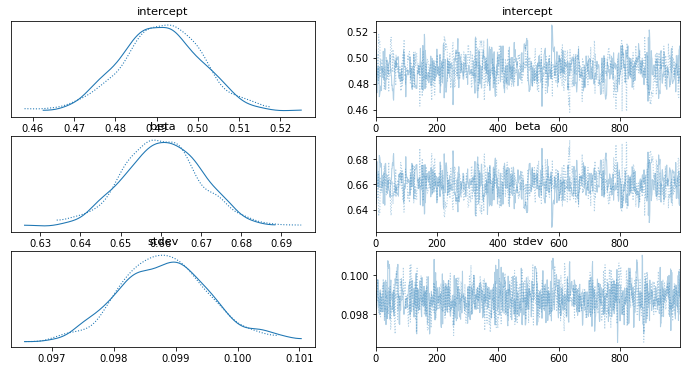

In [12]:
# 2. model that data with a simple regression model
with pm.Model() as exercise2:

  stdev = pm.HalfNormal('stdev', sd=1.)
  intercept = pm.Normal('intercept', mu=0.0, sd=1.)
  coeff = pm.Normal('beta', mu=0.5, sd=1.)

  expected_value = (X * coeff) + intercept
  y = pm.Normal('y', mu=expected_value, sd=stdev, observed=obs_y)

  trace = pm.sample(1000)

  pm.traceplot(trace, ['intercept', 'beta', 'stdev'])
  plt.show()

/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


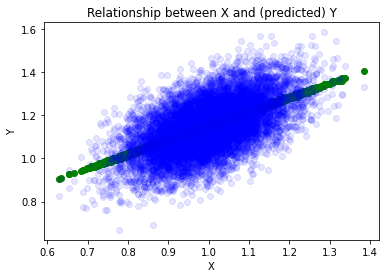

In [14]:
# 3. predictions (using training data for now)
with exercise2:
  ppc = pm.sample_posterior_predictive(trace, samples=1000) # Note: soon to be deprecated and
  # for each sample, the value of y for each data row
  y_preds = ppc['y']

# Same thing, but now using the expectation
expected_y_pred = np.reshape(np.mean(y_preds, axis=0), [-1])

plt.scatter(X, expected_y_pred, c='g')
plt.scatter(X, obs_y, c='b', alpha = 0.1)
plt.title("Relationship between X and (predicted) Y")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()
